# Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.- 
How well those variables describe the bike demand

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. 

- It will be used by the management to understand how exactly the demands vary with different features. 

- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

- Further, the model will be a good way for management to understand the demand dynamics of a new market. s

## Importing all the necessary libraries

In [3303]:
##Imprting libraies related to Linear Regression
import numpy as np
import pandas as pd

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for statistics and Model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading and reading the data

In [3305]:
#1.a Loading and Reading
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3306]:
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [3307]:
#1.b. General Information of data: Info, share & describe
#Understanding the abve dataset

#data Shape
print(bike_df.shape)
print("")

#Data Info
print(bike_df.info())
print("")

#Data Description/Summary
bike_df.describe()

(730, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Making data ready for the model building
- dropping irrelevant columns
- formatting columns to desired format.

In [3309]:
#Dropping 'instant' column as its just an index and no insight we are getting out of it.
bike_df.pop('instant')

#Dropping 'casual' and 'registered' user and our target variable is 'cnt' which is total count.
bike_df.pop('casual')
bike_df.pop('registered')

0       654
1       670
2      1229
3      1454
4      1518
       ... 
725    1867
726    2451
727    1182
728    1432
729    2290
Name: registered, Length: 730, dtype: int64

In [3310]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [3311]:
#Convert the 'dteday' datatype to date format.
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format='%d-%m-%Y')

In [3312]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.3 KB


In [3313]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [3314]:
#Changing Categorical numerical data with relevant name
#converting yr
year_dict={0:'2018',1:'2019'}
bike_df['yr'] = bike_df['yr'].map(year_dict)

# converting mnth
month_dict={1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC' }
bike_df['mnth'] = bike_df['mnth'].map(month_dict)

# converting season
season_dict={1:'spring',2:'summer',3:'fall',4:'winter'}
bike_df.season = bike_df.season.map(season_dict)

# converting weathersit
weathersit_dict={1:'clear',2:'misty_cloudy',3:'light_snow_rain',4:'heavy_rain_snow'}
bike_df.weathersit = bike_df.weathersit.map(weathersit_dict)

# converting weekday. As 1st January,2018 is Monday and is mapped with 6 in the sheet, taking days in that order.
weekday_dict={0:"tuesday",1:"wednesday",2:"thrusday",3:"friday",4:"saturday",5:"sunday",6:"monday"}
bike_df.weekday = bike_df.weekday.map(weekday_dict)

In [3315]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,JAN,0,monday,0,misty_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,JAN,0,tuesday,0,misty_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,JAN,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,JAN,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,JAN,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [3316]:
#Missing value check
bike_df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [3317]:
bike_df.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [3318]:
#Let's drop dteday as Year, Month and Weekday are already part of the dataset
bike_df.pop('dteday')

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [3319]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,JAN,0,monday,0,misty_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,JAN,0,tuesday,0,misty_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,JAN,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,JAN,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,JAN,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


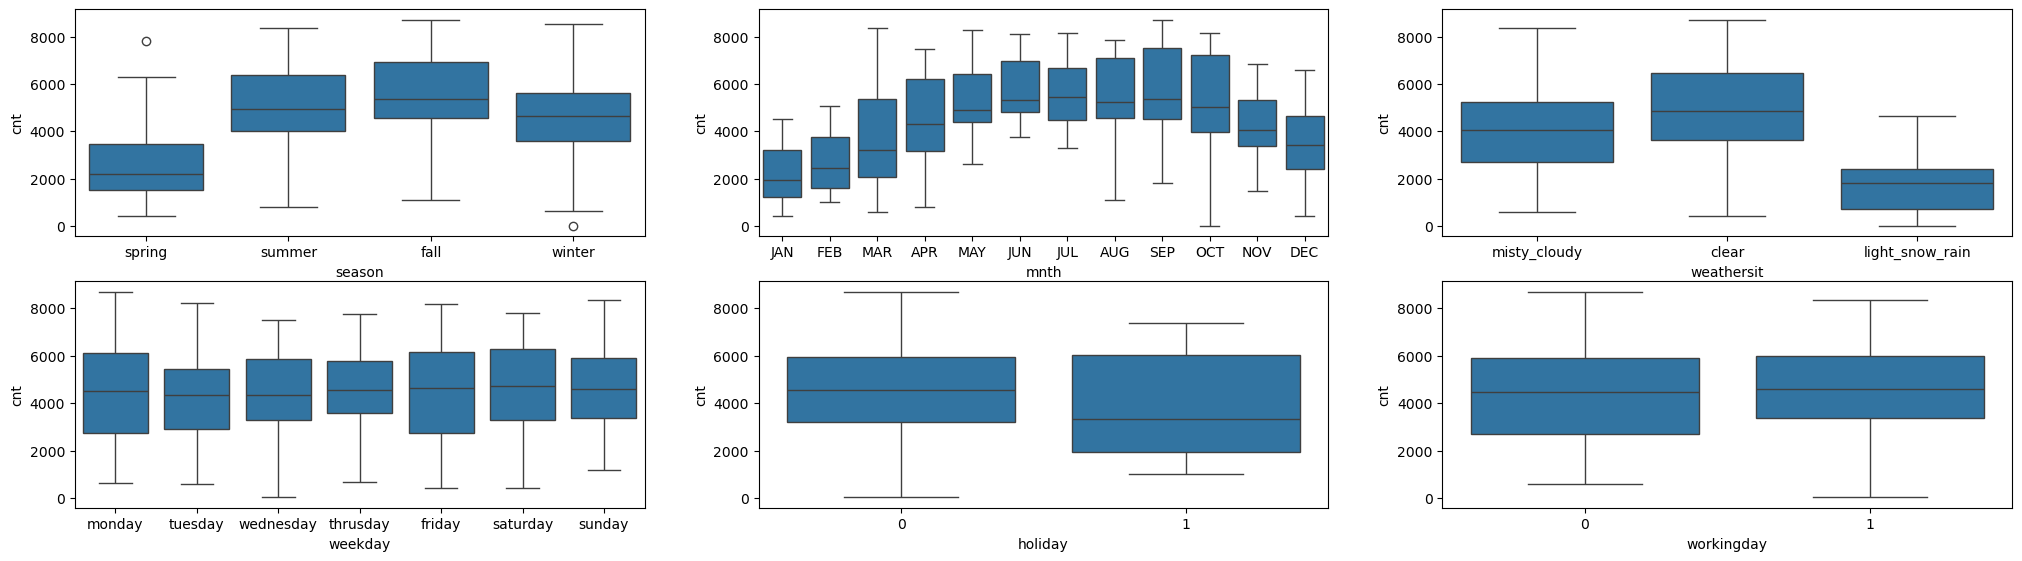

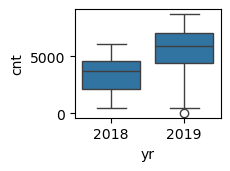

In [3320]:
#Box plot to see the variable distribution against the target variable 'cnt'

plt.figure(figsize=(25, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

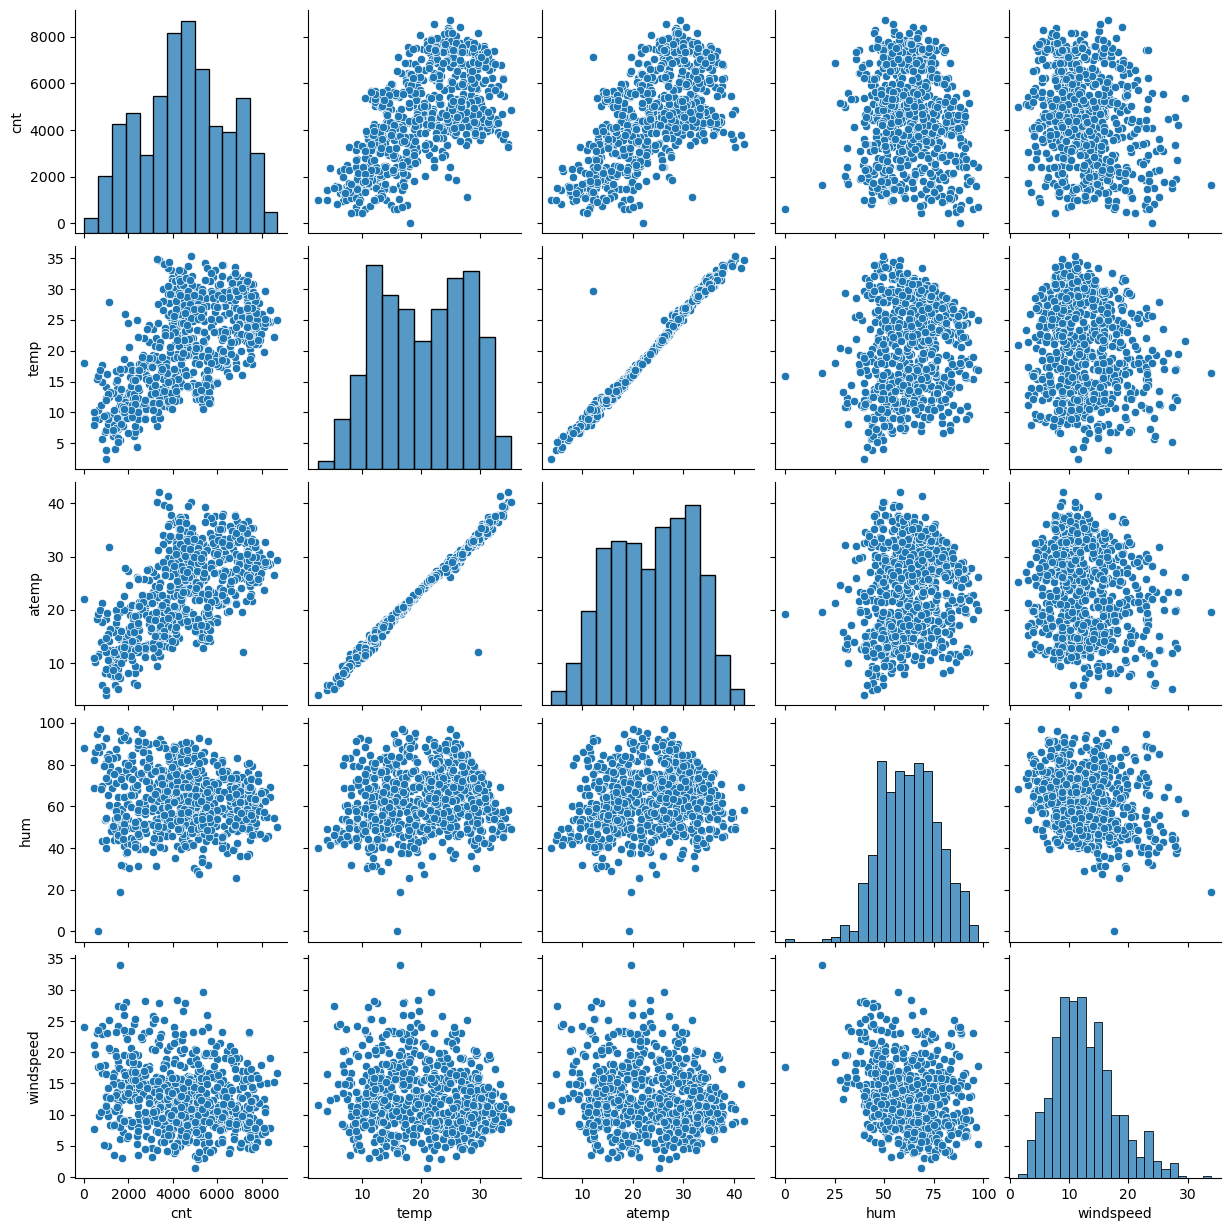

In [3321]:
sns.pairplot(bike_df[["cnt" , "temp" , "atemp" , "hum", "windspeed"]])
plt.show()

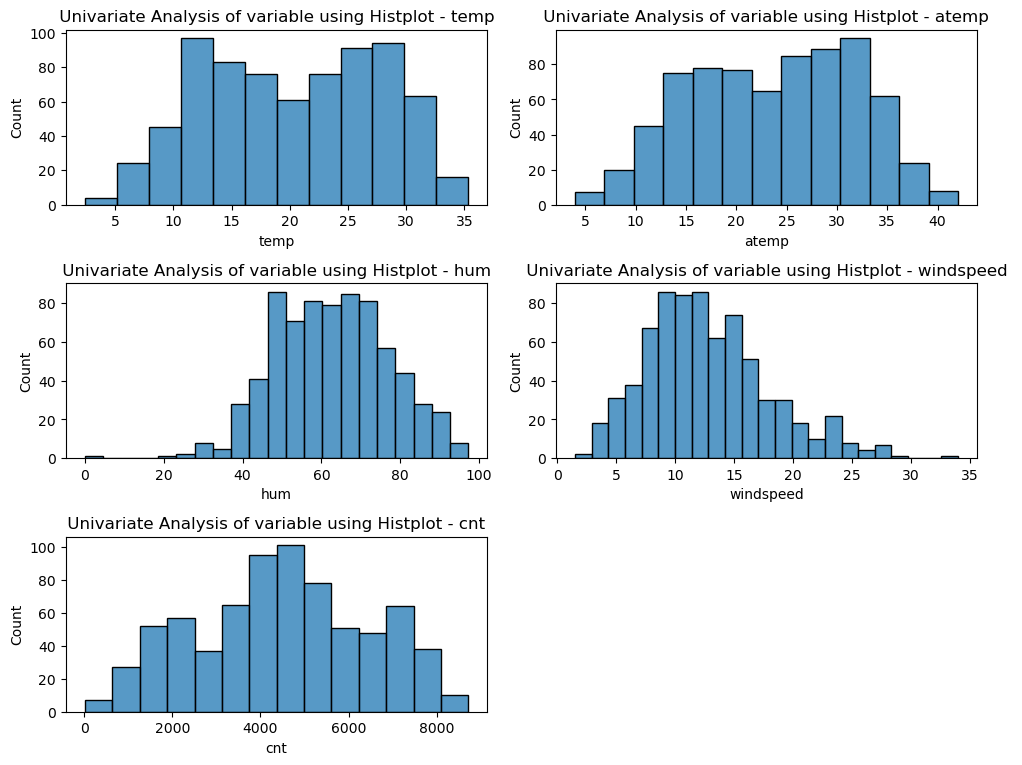

In [3322]:
num_cols=["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.histplot( x=bike_df[col])
    plt.title( f' Univariate Analysis of variable using Histplot - {col} ' )
plt.tight_layout()
plt.show()

## Dummy Variable creation

In [3324]:
#Lets create dummy variable for all the categorical columns and also removing the first value of each column:
dummy_data=pd.get_dummies(bike_df[['yr','mnth','weekday','season','weathersit']], dtype=int, drop_first=True)
dummy_data.head()

,yr_2019,mnth_AUG,mnth_DEC,mnth_FEB,mnth_JAN,mnth_JUL,mnth_JUN,mnth_MAR,mnth_MAY,mnth_NOV,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty_cloudy
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3325]:
#Adding the dummy variable columns to the actual data
bike_df=pd.concat([bike_df,dummy_data],axis=1)

In [3326]:
#As categorical variables are tuned into dummy variable, no need to keep these variables as well in the dataframe
#So, dropping these variables
print(bike_df.shape)
print(bike_df.columns)
bike_df=bike_df.drop(['season','yr','mnth','weekday','weathersit'],axis=1)
print(bike_df.shape)

(730, 35)
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr_2019',
       'mnth_AUG', 'mnth_DEC', 'mnth_FEB', 'mnth_JAN', 'mnth_JUL', 'mnth_JUN',
       'mnth_MAR', 'mnth_MAY', 'mnth_NOV', 'mnth_OCT', 'mnth_SEP',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thrusday', 'weekday_tuesday', 'weekday_wednesday',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow_rain', 'weathersit_misty_cloudy'],
      dtype='object')
(730, 30)


In [3327]:
bike_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_2019,mnth_AUG,mnth_DEC,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty_cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Train-Test split of data

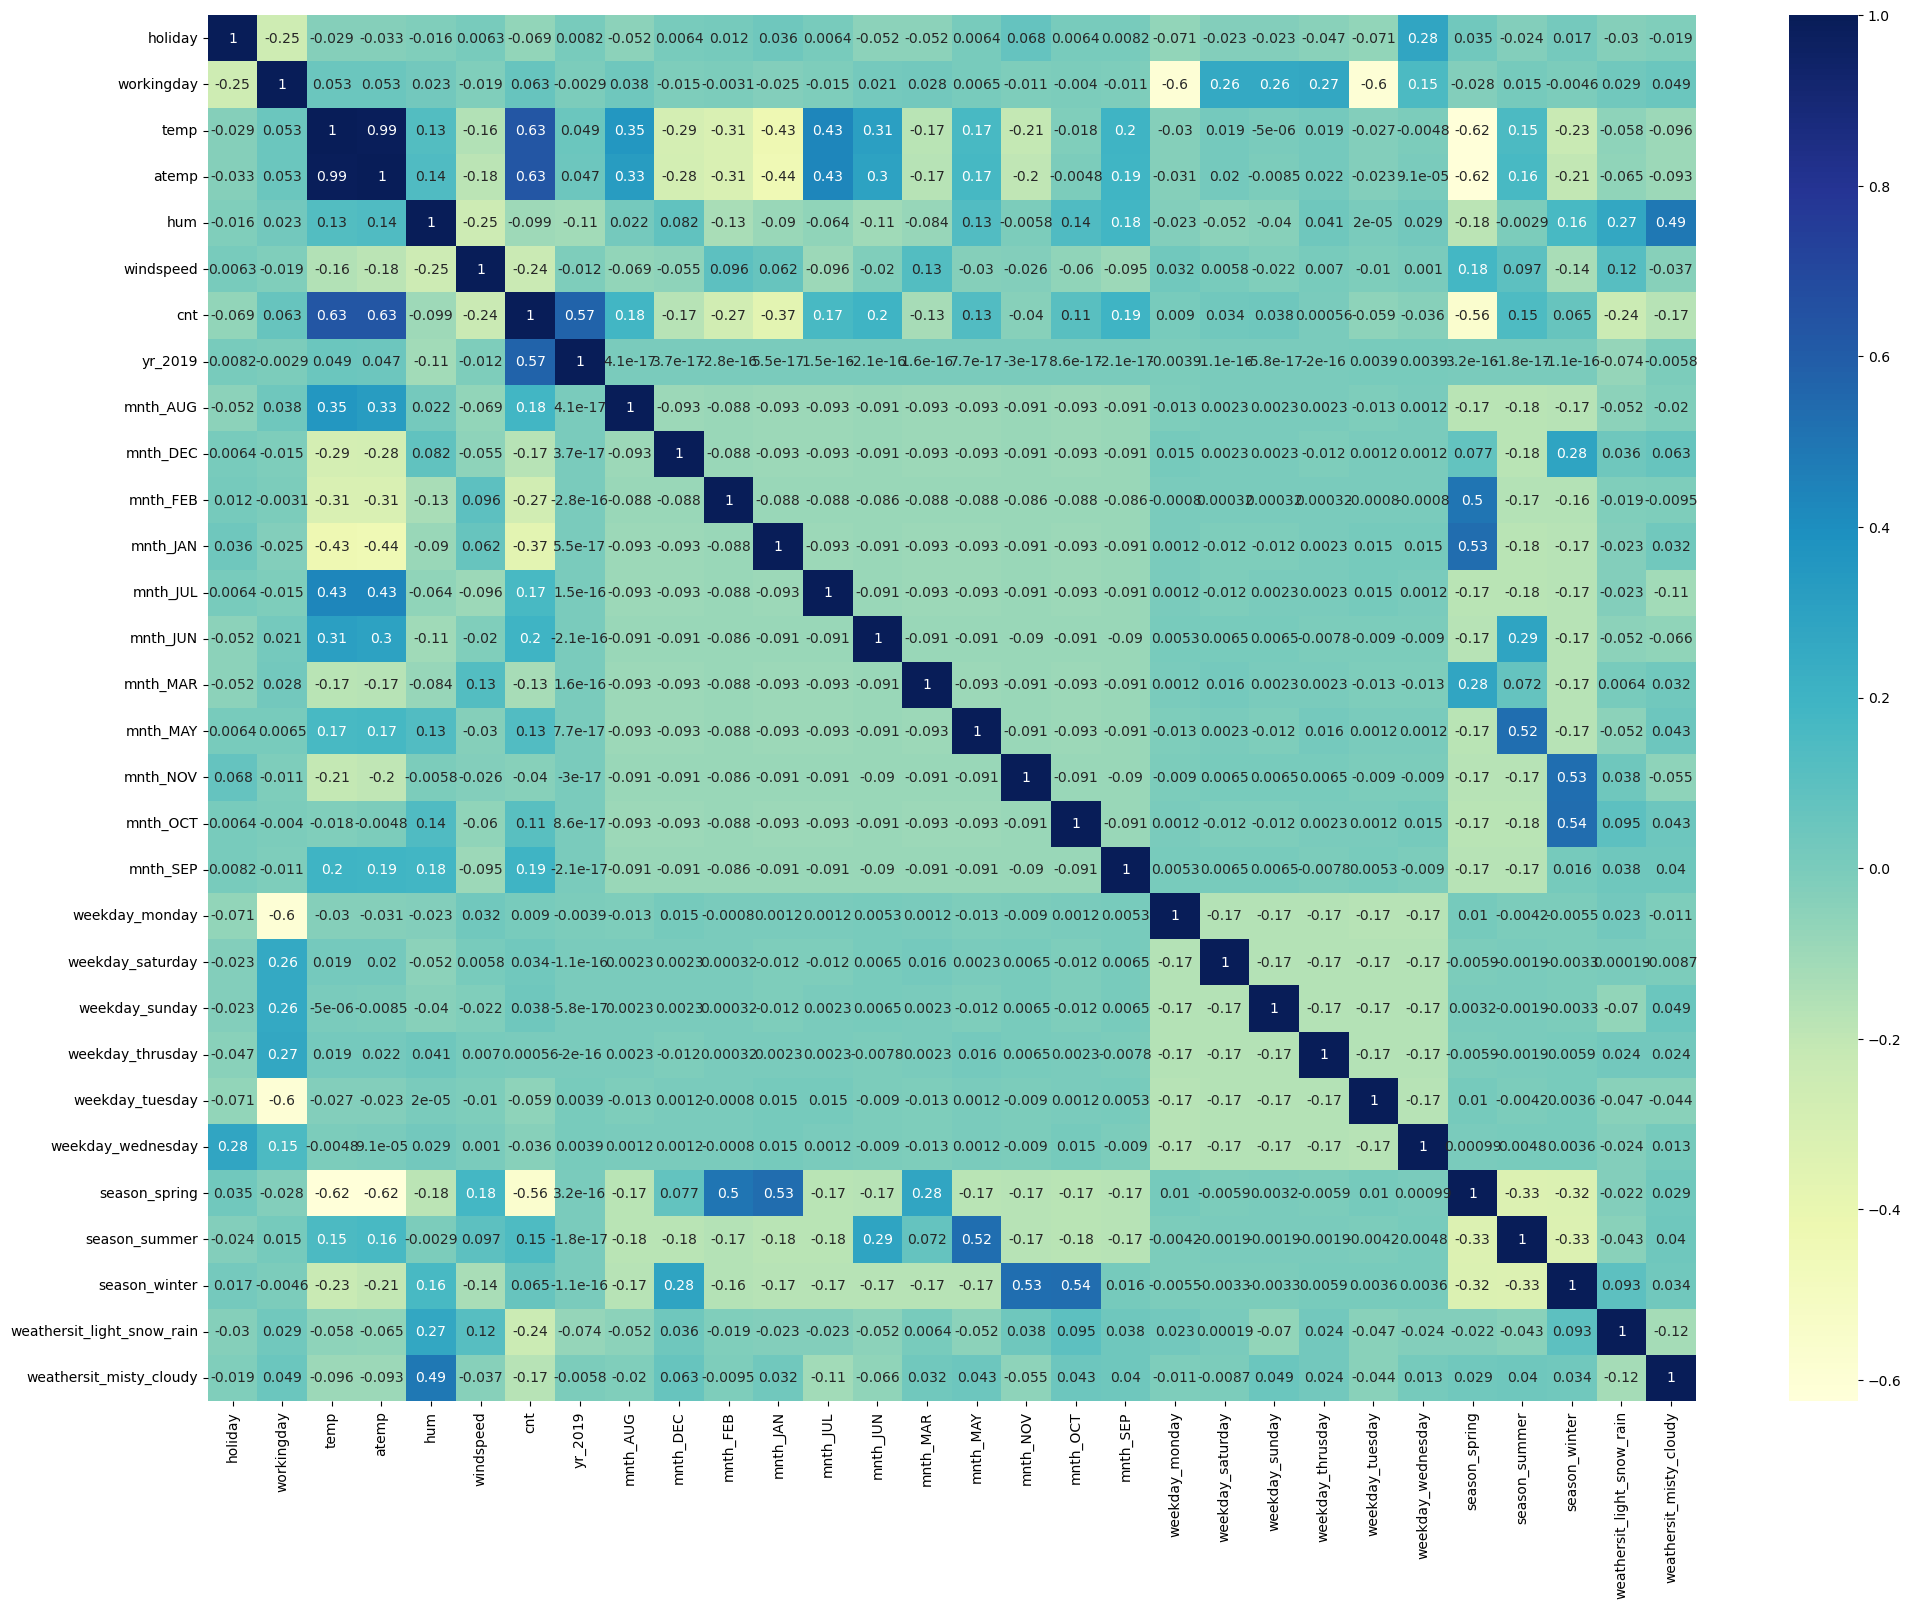

In [3329]:
plt.figure(figsize = (24,18))
sns.heatmap(bike_df.corr() , annot=True , cmap = 'YlGnBu')
plt.show()

In [3330]:
#There is a lot of lnear relationship between 'temp' and 'atemp'. Let's drop atemp as keeping both will create multicolinearity
bike_df.pop('atemp')

0      18.18125
1      17.68695
2       9.47025
3      10.60610
4      11.46350
         ...   
725    11.33210
726    12.75230
727    12.12000
728    11.58500
729    11.17435
Name: atemp, Length: 730, dtype: float64

In [3331]:
bike_df.head()

,holiday,workingday,temp,hum,windspeed,cnt,yr_2019,mnth_AUG,mnth_DEC,mnth_FEB,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty_cloudy
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3332]:
df_train, df_test=train_test_split( bike_df, train_size=0.70 , random_state=100 )
print(df_train.shape, df_test.shape , bike_df.shape)

(510, 29) (220, 29) (730, 29)


# scaling the train data set

In [3334]:
# Instantiating an object
scaler = MinMaxScaler()
#create a lits of  numerical variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# Fit the scaler on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,yr_2019,mnth_AUG,mnth_DEC,mnth_FEB,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty_cloudy
576,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
111,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [3335]:
#X_train and y_train data creation
y_train = df_train.pop('cnt')
X_train = df_train

#X_test and y_test data creation
y_test = df_test.pop('cnt')
X_test = df_test

## Model Building

In [3337]:
X_train_sm=sm.add_constant(X_train)
model=sm.OLS(np.array(y_train),X_train_sm)
result=model.fit()
print(result.summary())

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.00e-181
Time:                        12:10:33   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [3338]:
#Recursively, lets see the VIF and the p-value(along with other statistical parameters) to rule out columns which can be discarded.
print(X_train_sm.shape)

#First Iteration: As 'mnth_MAR' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_MAR'],axis=1)
X_test = X_test.drop(['mnth_MAR'],axis=1)

#Second Iteration: As 'mnth_JUN' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_JUN'],axis=1)
X_test = X_test.drop(['mnth_JUN'],axis=1)

#Third Iteration: As 'mnth_OCT' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_OCT'],axis=1)
X_test = X_test.drop(['mnth_OCT'],axis=1)

#Fourth Iteration: As 'weekday_saturday' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['weekday_saturday'],axis=1)
X_test = X_test.drop(['weekday_saturday'],axis=1)

#Fifth Iteration: As 'holiday' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['holiday'],axis=1)
X_test = X_test.drop(['holiday'],axis=1)

#Sixth Iteration: As 'weekday_sunday' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['weekday_sunday'],axis=1)
X_test = X_test.drop(['weekday_sunday'],axis=1)

#Seventh Iteration: As 'mnth_AUG' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_AUG'],axis=1)
X_test = X_test.drop(['mnth_AUG'],axis=1)

#Eighth Iteration: As 'weekday_thrusday' as very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['weekday_thrusday'],axis=1)
X_test = X_test.drop(['weekday_thrusday'],axis=1)

#Nineth Iteration: As 'weekday_wednesday' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['weekday_wednesday'],axis=1)
X_test = X_test.drop(['weekday_wednesday'],axis=1)

#Tenth Iteration: As 'mnth_MAY' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_MAY'],axis=1)
X_test = X_test.drop(['mnth_MAY'],axis=1)

#Eleventh Iteration: As 'mnth_FEB' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_FEB'],axis=1)
X_test = X_test.drop(['mnth_FEB'],axis=1)

#Twelveth Iteration: As 'weekday_tuesday' has very high p-value let's drop it.
X_train_sm = X_train_sm.drop(['weekday_tuesday'],axis=1)
X_test = X_test.drop(['weekday_tuesday'],axis=1)

#As now, all the p-values are under 5%(0.05), Lets look at the VIF which are above.

#Thirteenth Iteration: As 'season_spring' has  higher VIF than 5. let's drop it.
X_train_sm = X_train_sm.drop(['season_spring'],axis=1)
X_test = X_test.drop(['season_spring'],axis=1)

#Fourteenth Iteration: As 'mnth_DEC' has  high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_DEC'],axis=1)
X_test = X_test.drop(['mnth_DEC'],axis=1)

#Fifteenth Iteration: As 'mnth_NOV' has  high p-value let's drop it.
X_train_sm = X_train_sm.drop(['mnth_NOV'],axis=1)
X_test = X_test.drop(['mnth_NOV'],axis=1)
print(X_train_sm.shape)




(510, 29)
(510, 14)


In [3339]:
model=sm.OLS(np.array(y_train),X_train_sm)
result=model.fit()
print(result.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          4.53e-191
Time:                        12:10:33   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [3340]:
X_test_sm = sm.add_constant(X_test)
y_train_pred = result.predict(X_train_sm)
y_test_pred = result.predict(X_test_sm)

y_train_pred.shape

(510,)

Text(0.5, 0, 'Errors')

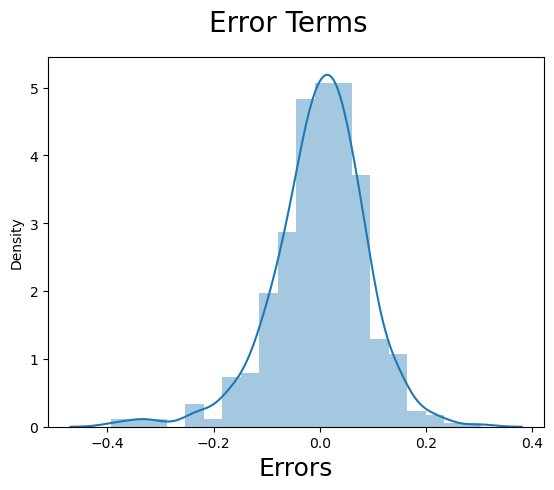

In [3341]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

##  Model Evaluation

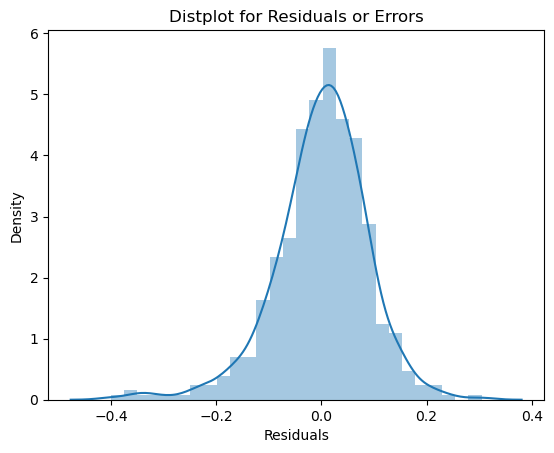

In [3344]:
# 3.Visualising the residual value to check if the model not failing any conditions
sns.distplot(residual)
plt.xlabel('Residuals' )
plt.title('Distplot for Residuals or Errors')                 
plt.show()

Text(0, 0.5, 'y_train_pred')

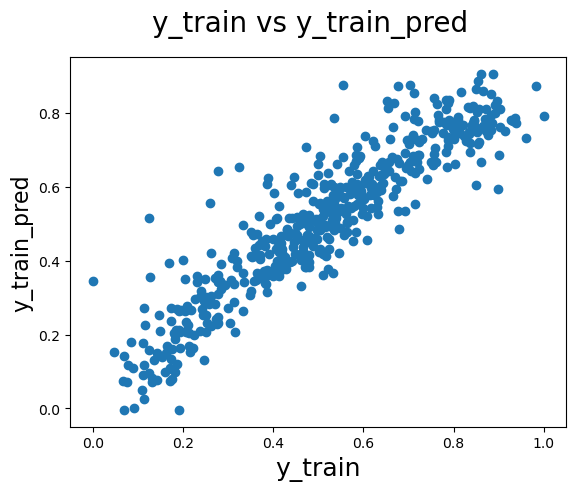

In [3345]:
# Plotting y_test and y_pred to understand the spread
y_test.shape
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)        # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)      

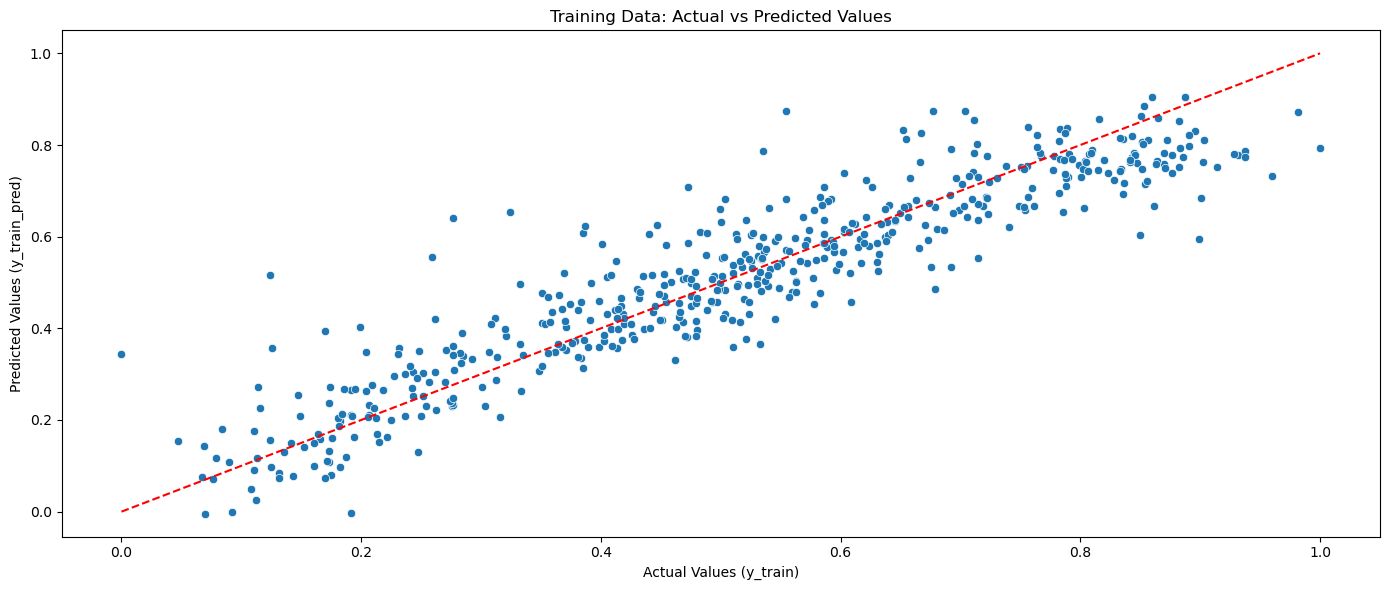

In [3346]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.title('Training Data: Actual vs Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  

# Show the plot
plt.tight_layout()
plt.show()

#### We can see that the equation of our best fitted line is:

$ count(cnt) = 0.1907  + 0.0526 \times workingday + 0.5684 \times temp -0.1643 \times hum - 0.1943 \times windspeed + 0.2296 \times yr_2019 - 0.0401 \times mnth_JAN  - 0.0429 \times mnth_JUL + 0.0909 \times mnth_SEP + 0.0629 \times weekday_monday + 0.0765 \times season_summer + 0.1251 \times season_winter - 0.2425 \times weathersit_light_snow_rain - 0.0538 \times weathersit_misty_cloudy$